In [11]:
from PIL import Image
import requests
from transformers import pipeline
import torchvision.transforms.functional as tvF

In [2]:
from transformers import pipeline
generator =  pipeline(model='facebook/sam-vit-base', task='mask-generation', points_per_batch=256)
image_url = 'https://huggingface.co/ybelkada/segment-anything/resolve/main/assets/car.png'
raw_image = Image.open(requests.get(image_url, stream=True).raw).convert('RGB')
outputs = generator(image_url)

In [12]:
tvF.pil_to_tensor(raw_image)

tensor([[[162, 158, 158,  ..., 170, 170, 169],
         [ 95,  93,  92,  ...,  99,  99,  99],
         [ 34,  31,  31,  ...,  35,  35,  35],
         ...,
         [117,  47,  24,  ..., 186, 182, 178],
         [116,  46,  22,  ..., 164, 160, 157],
         [113,  45,  15,  ..., 109, 106, 104]],

        [[162, 158, 158,  ..., 170, 170, 169],
         [ 95,  93,  92,  ...,  99,  99,  99],
         [ 34,  31,  31,  ...,  34,  34,  34],
         ...,
         [117,  47,  24,  ..., 183, 179, 175],
         [116,  46,  21,  ..., 161, 157, 154],
         [113,  45,  15,  ..., 107, 105, 102]],

        [[162, 158, 158,  ..., 170, 170, 169],
         [ 95,  93,  92,  ...,  99,  99,  99],
         [ 34,  31,  31,  ...,  34,  34,  34],
         ...,
         [117,  47,  24,  ..., 188, 184, 180],
         [116,  46,  22,  ..., 165, 162, 159],
         [113,  45,  15,  ..., 110, 108, 105]]], dtype=torch.uint8)

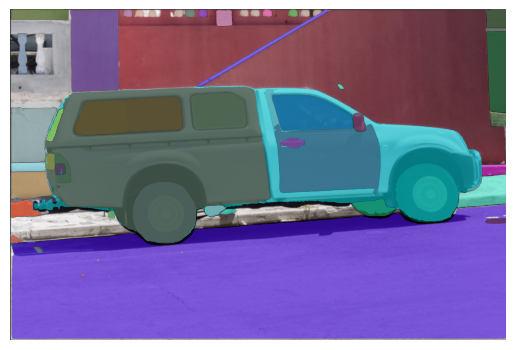

In [3]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30 / 255, 144 / 255, 255 / 255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    

plt.imshow(np.array(raw_image))
ax = plt.gca()
for mask in outputs['masks']:
    show_mask(mask, ax=ax, random_color=True)
plt.axis('off')
plt.show()

In [6]:
outputs['masks']

[array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]),
 array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]),
 array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, Fal